<a href="https://colab.research.google.com/github/ThuyHaLE/Regression/blob/main/Linear_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib . pyplot as plt
import random
from google.colab import files

#Linear Regression, non-vectorization

##Data preparation

###Functions

In [2]:
def prepare_data (file_name_dataset) :
  data = np.genfromtxt (file_name_dataset, delimiter =',', skip_header =1).tolist()
  N = len( data )
  tv_data = get_column(data, 0)
  radio_data = get_column(data , 1)
  newspaper_data = get_column(data , 2)
  sales_data = get_column(data, 3)
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X , y
def get_column ( data , index ) :
  result = [row[index] for row in data]
  return result

###Results

In [3]:
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [4]:
X, y = prepare_data('advertising.csv')

##Linear regression for $y = ax + b, Loss:MSE=(y_{hat}−y)^2$, Stochastic gradient descent

###Functions

In [5]:
def initialize_params () :
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)
  b = 0
  return w1, w2, w3, b
def predict(x1, x2, x3, w1, w2, w3, b):
  result = x1*w1 + x2*w2 + x3*w3 + b
  return result
def update_weight_wi(wi, dl_dwi, lr):
  wi = wi - (lr*dl_dwi)
  return wi
def update_weight_b(b, dl_db, lr):
  b = b - (lr*dl_db)
  return b

In [6]:
def compute_loss_mse(y_hat, y):
  loss = (y_hat - y)**2
  return loss
def compute_gradient_wi_mse(xi, y, y_hat):
  dl_dwi = 2*xi*(y_hat - y)
  return dl_dwi
def compute_gradient_b_mse(y, y_hat):
  dl_db = 2*(y_hat - y)
  return dl_db
def implement_linear_regression_mse(X_data ,y_data ,epoch_max = 2 ,lr = 1e-5):
  losses = []
  w1 , w2 , w3 , b = initialize_params ()
  N = len(y_data)
  for epoch in range (epoch_max) :
    # update parameters for each sample (stochastic gradient descent)
    for i in range (N):
      #get a sample
      x1 = X_data [0][i]
      x2 = X_data [1][i]
      x3 = X_data [2][i]
      y = y_data [i]
      #compute output
      y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )
      # compute loss
      loss = compute_loss_mse (y , y_hat)
      # compute gradient for w1, w2, w3, b
      dl_dw1 = compute_gradient_wi_mse (x1 , y , y_hat)
      dl_dw2 = compute_gradient_wi_mse (x2 , y , y_hat)
      dl_dw3 = compute_gradient_wi_mse (x3 , y , y_hat)
      dl_db = compute_gradient_b_mse (y , y_hat)
      # update parameters w1, w2, w3, b
      w1 = update_weight_wi (w1, dl_dw1, lr )
      w2 = update_weight_wi (w2, dl_dw2, lr )
      w3 = update_weight_wi (w3, dl_dw3, lr )
      b = update_weight_b (b, dl_db, lr )
      # logging
      losses.append(loss)
  return (w1, w2, w3, b,losses)
def plot_losses(losses):
  plt.plot(losses)
  plt.xlabel("#iteration")
  plt.ylabel("Loss")
  plt.show ()

###Results

w1: 0.07514340515774055,
w2: 0.13384170724907318, 
w3: 0.03280532038507357, 
b: 0.007358421757650418, 
last loss: 36.308116976611


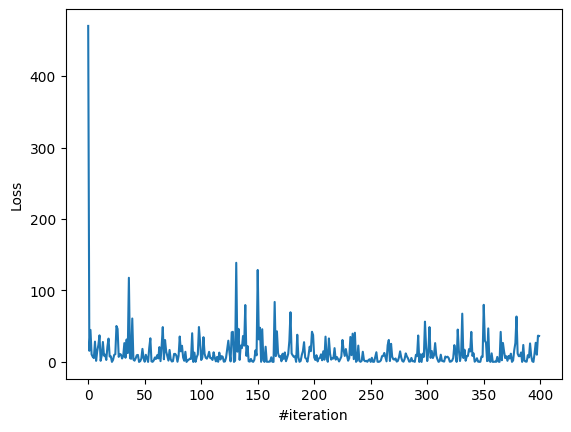

In [17]:
(w1, w2, w3, b, losses) = implement_linear_regression_mse(X, y)
print(f'w1: {w1},\nw2: {w2}, \nw3: {w3}, \nb: {b}, \nlast loss: {losses[-1]}')
plot_losses(losses)

In [8]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print (f'predicted sales is {sales}')

predicted sales is 7.9538819352358345


##Linear regression for $y=ax+b, Loss: MAE = |y_{hat} - y|$, Stochastic gradient descent

$|x| = \sqrt{x^2}$ \
$(|x|)'= (\sqrt{x^2})'$ \
$(\sqrt{u})’=\frac{u u’}{|u|}$

###Functions

In [9]:
def compute_lossMAE(y_hat, y):
  loss = abs(y_hat - y)
  return loss
def compute_gradient_wiMAE(xi, y, y_hat):
  dl_dwi = xi*(((y_hat - y)**2)*2*(y_hat - y))/abs((y_hat - y)**2)
  return dl_dwi
def compute_gradient_bMAE(y, y_hat):
  dl_db = (((y_hat - y)**2)*2*(y_hat - y))/abs((y_hat - y)**2)
  return dl_db
def implement_linear_regression_MAE(X_data, y_data, epoch_max = 1, lr = 1e-5) :
  losses = []
  w1 , w2 , w3 , b = initialize_params()
  N = len( y_data )
  for epoch in range ( epoch_max ) :
    for i in range ( N ) :
      x1 = X_data [0][i]
      x2 = X_data [1][i]
      x3 = X_data [2][i]
      y = y_data [i]
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)
      loss = compute_lossMAE(y, y_hat)
      dl_dw1 = compute_gradient_wiMAE(x1, y, y_hat)
      dl_dw2 = compute_gradient_wiMAE(x2, y, y_hat)
      dl_dw3 = compute_gradient_wiMAE(x3, y, y_hat)
      dl_db = compute_gradient_bMAE(y, y_hat)
      w1 = update_weight_wi(w1, dl_dw1, lr)
      w2 = update_weight_wi(w2, dl_dw2, lr)
      w3 = update_weight_wi(w3, dl_dw3, lr)
      b = update_weight_b(b, dl_db, lr)
      losses.append(loss)
  return (w1, w2, w3, b, losses)

###Results

w1: 0.07573936826268583,
w2: 0.10560502592961352, 
w3: 0.04547367472492268, 
b: 0.00429321012251754, 
last loss: 6.058412172330213


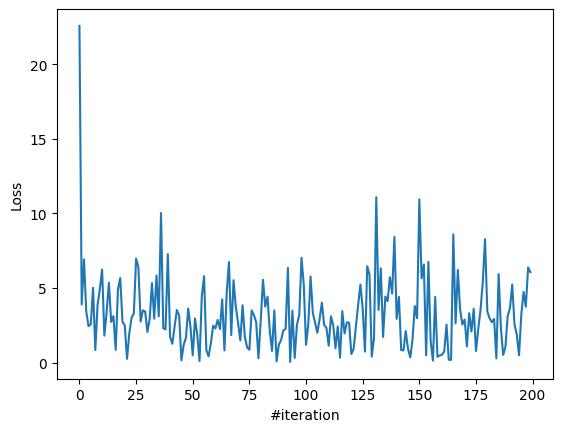

In [18]:
(w1, w2, w3, b, losses) = implement_linear_regression_MAE (X , y )
print(f'w1: {w1},\nw2: {w2}, \nw3: {w3}, \nb: {b}, \nlast loss: {losses[-1]}')
plot_losses(losses)

In [11]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
sales = predict (tv, radio, newspaper, w1, w2, w3, b)
print (f'predicted sales is {sales}')

predicted sales is 7.643119289561318


##Linear regression for $y = a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n + b$, Loss: MSE, Batch gradient descent

###Functions

In [12]:
def implement_linear_regression_nsamples_MSE ( X_data , y_data , epoch_max =50 , lr =1e-5) :
  losses = []
  w1 , w2 , w3 , b = initialize_params()
  N = len( y_data )
  for epoch in range ( epoch_max ) :
      loss_total = 0.0
      dw1_total = 0.0
      dw2_total = 0.0
      dw3_total = 0.0
      db_total = 0.0
      #update parameters for all samples (Batch gradient descent, batch size = len(data))
      for i in range ( N ) :
        x1 = X_data [0][ i ]
        x2 = X_data [1][ i ]
        x3 = X_data [2][ i ]
        y = y_data [ i ]
        y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )

        loss = compute_loss_mse (y , y_hat )
        loss_total = loss_total + loss

        dl_dw1 = compute_gradient_wi_mse ( x1 , y , y_hat )
        dl_dw2 = compute_gradient_wi_mse ( x2 , y , y_hat )
        dl_dw3 = compute_gradient_wi_mse ( x3 , y , y_hat )
        dl_db = compute_gradient_b_mse (y , y_hat )

        dw1_total = dw1_total + dl_dw1
        dw2_total = dw2_total + dl_dw2
        dw3_total = dw3_total + dl_dw3
        db_total = db_total + dl_db

      w1 = update_weight_wi (w1 , dw1_total/N, lr )
      w2 = update_weight_wi (w2 , dw2_total/N, lr )
      w3 = update_weight_wi (w3 , dw3_total/N, lr )
      b = update_weight_b (b ,db_total/N, lr )
      losses.append(loss_total/N)

  return (w1 , w2 , w3 ,b , losses)

###Results

w1: 0.06710495738115431,
w2: 0.15771724965314632, 
w3: 0.02953414797566288, 
b: 0.015492828809816067, 
last loss: 5.809666847941215


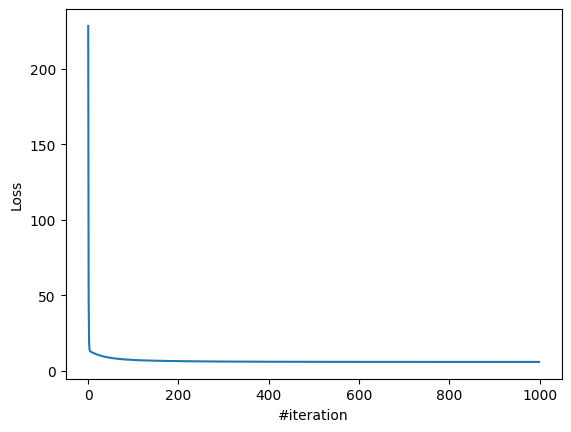

In [19]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples_MSE (X , y , epoch_max =1000 , lr =1e-5)
print(f'w1: {w1},\nw2: {w2}, \nw3: {w3}, \nb: {b}, \nlast loss: {losses[-1]}')
plot_losses(losses)

##Linear regression for $y = a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n + b$, Loss: MAE, Batch gradient descent

###Functions

In [14]:
def implement_linear_regression_nsamples_MAE ( X_data , y_data , epoch_max =50 , lr =1e-5) :
  losses = []
  w1 , w2 , w3 , b = initialize_params ()
  N = len( y_data )

  for epoch in range ( epoch_max ) :
      loss_total = 0.0
      dw1_total = 0.0
      dw2_total = 0.0
      dw3_total = 0.0
      db_total = 0.0

      for i in range ( N ) :
        x1 = X_data [0][i]
        x2 = X_data [1][i]
        x3 = X_data [2][i]
        y = y_data [ i ]
        y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )

        loss = compute_lossMAE (y , y_hat )
        loss_total = loss_total + loss

        dl_dw1 = compute_gradient_wiMAE (x1 , y, y_hat)
        dl_dw2 = compute_gradient_wiMAE (x2 , y, y_hat)
        dl_dw3 = compute_gradient_wiMAE (x3 , y, y_hat)
        dl_db = compute_gradient_bMAE (y , y_hat)
        dw1_total = dw1_total + dl_dw1
        dw2_total = dw2_total + dl_dw2
        dw3_total = dw3_total + dl_dw3
        db_total = db_total + dl_db

      w1 = update_weight_wi (w1 , dw1_total/N, lr)
      w2 = update_weight_wi (w2 , dw2_total/N, lr)
      w3 = update_weight_wi (w3 , dw3_total/N, lr)
      b = update_weight_b (b ,db_total/N, lr)
      losses.append(loss_total/N)

  return (w1 , w2 , w3 ,b , losses)

###Results

w1: 0.06711956077493303,
w2: 0.157251562596023, 
w3: 0.029789756987631148, 
b: 0.015697460226330524, 
last loss: 1.9109938960367543


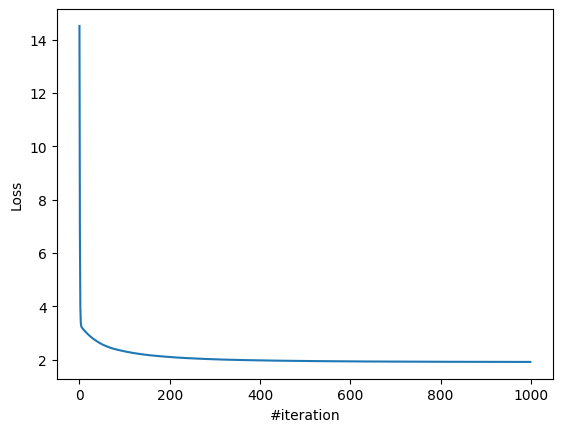

In [20]:
(w1 , w2 , w3 ,b , losses) = implement_linear_regression_nsamples_MAE (X , y , epoch_max =1000 , lr =1e-5)
print(f'w1: {w1},\nw2: {w2}, \nw3: {w3}, \nb: {b}, \nlast loss: {losses[-1]}')
plot_losses(losses)

#Linear Regression, vectorization $X = [1, x_1, x_2, x_3, ..., x_n]$

##Data Preparation

###Functions

In [21]:
def prepare_data_vec(file_name_dataset, normalization = 0) :
  data = np . genfromtxt ( file_name_dataset , delimiter =',', skip_header =1)
  X = data[: ,:3]
  y = data[: ,3:]
  N = len(X)
  normed_X = X
  if normalization == 1: #Min-max normalization for each feature
    normed_X = min_max_scaling_1feature(X)
  elif normalization == 2: #Min-max normalization for all features
    normed_X = min_max_scaling_allfeatures (X)
  elif normalization == 3: #Mean normalization for all features
    normed_X = mean_normalization (X)
  X_ = np.c_[np.ones((N, 1)),normed_X] #Non-normalization
  return X_ , y

###Min-max normalization: $X_{new} = \frac{X_{old}−X_{min}}{X_{max}−X_{min}}$

In [22]:
def min_max_scaling_1feature(X):
  normed_X = np.zeros(X.shape)
  for i in range(X.shape[1]):
    normed_X[:,i:i+1] = (X[:,i:i+1]-min(X[:,i:i+1]))/(max(X[:,i:i+1])-min(X[:,i:i+1]))
  return normed_X

def min_max_scaling_allfeatures (X) :
  normed_X = (X - np.min(X))/(np.max(X)-np.min(X))
  return normed_X

### Mean normalization: $X_{new} = \frac{X_{old}−X_{mean}}{X_{max}−X_{min}}$

In [23]:
def  mean_normalization (X) :
  normed_X  = (X - np.mean(X)) / (np.max(X)- np.min(X))
  return normed_X

###Results

In [24]:
X_, y_ = prepare_data_vec('advertising.csv', normalization = 0)
X_1,y_1 = prepare_data_vec('advertising.csv', normalization = 1)
X_2,y_2 = prepare_data_vec('advertising.csv', normalization = 2)
X_3,y_3 = prepare_data_vec('advertising.csv', normalization = 3)

##Linear regression for $y = x_0b + x_1w_1 + x_2w_2 + x_3w_3, Loss: MSE$


###Functions

####Stochastic_gradient_descent()

In [25]:
def stochastic_gradient_descent ( X_b , y , n_epochs =50 , learning_rate =0.00001) :
  thetas = np.random.randn(4 , 1)
  thetas_path = [thetas]
  losses = []
  N = len(y)

  for epoch in range ( n_epochs ) :
    for i in range(N) :
      random_index = np.random.randint(N) # select random number in N
      xi = X_b[random_index : random_index +1]
      yi = y[random_index : random_index +1]

      yi_hat = xi.dot(thetas) # Compute output

      li = 1/2 * (yi_hat - yi)**2 # Compute loss li

      li_grad = (yi_hat - yi) # Compute gradient for loss

      xi_grad = xi.T.dot(li_grad) # Compute gradient

      thetas = thetas - (learning_rate*xi_grad) # update theta

      thetas_path.append(thetas) # logging
      losses.append(li[0][0])

  return thetas_path , losses

best loss is 1.4888307413836326e-08 with index is 6053 and best theta is [[ 4.90159014]
 [15.94259944]
 [ 5.18644186]
 [ 0.43949585]]


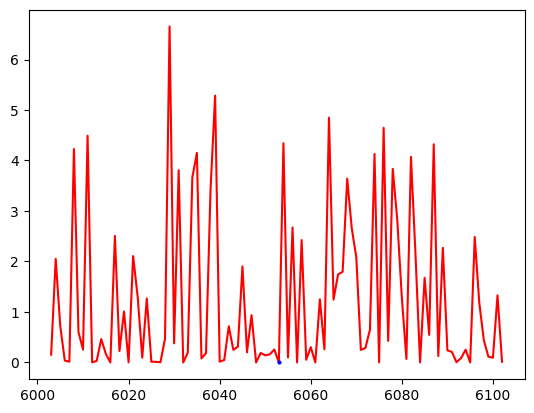

In [26]:
sgd_theta , losses = stochastic_gradient_descent(X_1, y_1 , n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]

print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

x_axis = list(range(index_best_loss-50, index_best_loss+50))
plt.plot(x_axis, losses[index_best_loss-50:index_best_loss+50], color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

best loss is 8.023068307274018e-09 with index is 356 and best theta is [[11.00351518]
 [ 8.12621548]
 [ 2.87188768]
 [ 1.66110512]]


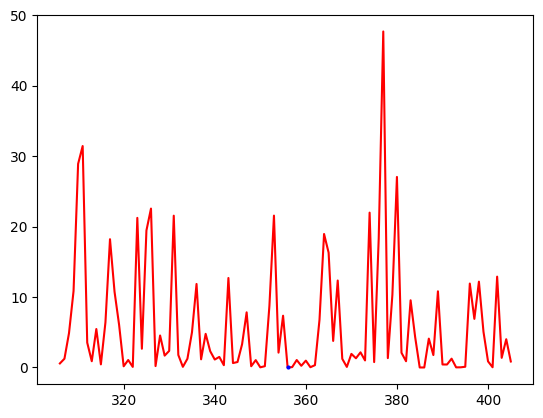

In [27]:
sgd_theta , losses = stochastic_gradient_descent(X_2, y_2 , n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]

print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

x_axis = list(range(index_best_loss-50, index_best_loss+50))
plt.plot(x_axis, losses[index_best_loss-50:index_best_loss+50], color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

best loss is 3.052654368992669e-09 with index is 6060 and best theta is [[11.18235891]
 [16.2686379 ]
 [ 2.46616844]
 [ 1.20984525]]


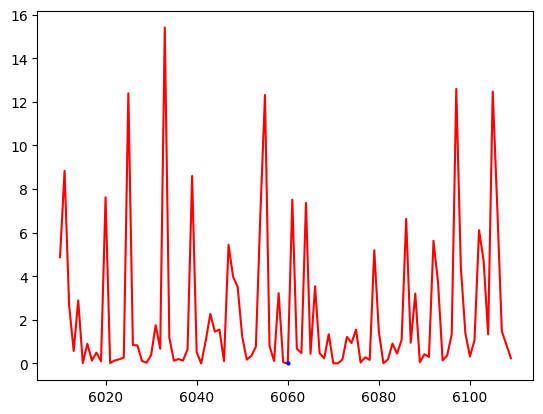

In [28]:
sgd_theta , losses = stochastic_gradient_descent(X_3, y_3 , n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]

print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

x_axis = list(range(index_best_loss-50, index_best_loss+50))
plt.plot(x_axis, losses[index_best_loss-50:index_best_loss+50], color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

####Mini_batch_gradient_descent()

In [29]:
def mini_batch_gradient_descent ( X_b , y , n_epochs =50 , minibatch_size =20 , learning_rate =0.01) :
  thetas = np.random.randn(4 , 1)
  thetas_path = [ thetas ]
  losses = []
  N = len(y)

  for epoch in range (n_epochs) :
    shuffled_indices = np. random.permutation (N)
    X_b_shuffled = X_b [ shuffled_indices ]
    y_shuffled = y [ shuffled_indices ]
    for i in range (0 , N , minibatch_size ):
      xi = X_b_shuffled [ i : i + minibatch_size ]
      yi = y_shuffled [ i: i + minibatch_size ]

      yi_hat = xi.dot(thetas)

      loss = 1/2 *(yi_hat - yi)**2

      d_loss = (yi_hat - yi)

      gradients = xi.T.dot(d_loss)

      thetas = thetas - learning_rate*(gradients/minibatch_size)

      thetas_path.append (thetas)
      loss_mean = np.sum(loss) / minibatch_size
      losses.append (loss_mean)

  return thetas_path , losses

500
best loss is 1.8705215626767022 with index is 487 and best theta is [[8.39636764]
 [7.66467405]
 [4.99743702]
 [3.07337043]]


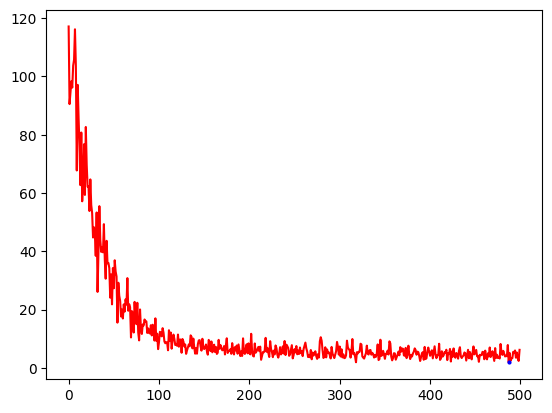

In [30]:
sgd_theta , losses = mini_batch_gradient_descent(X_1, y_1 , n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 1.3648840080471252 with index is 479 and best theta is [[10.23670345]
 [ 9.9383809 ]
 [ 1.51737822]
 [ 0.4600359 ]]


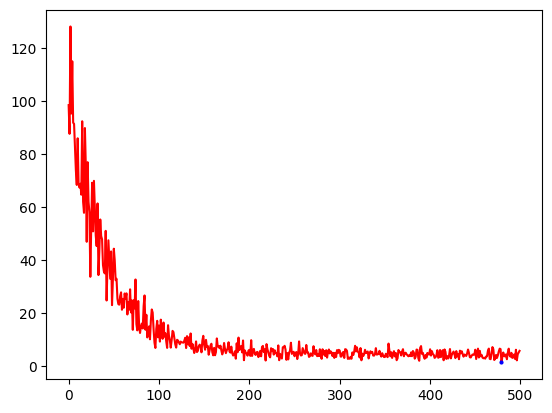

In [31]:
sgd_theta , losses = mini_batch_gradient_descent(X_2, y_2 , n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 2.1310904440608534 with index is 278 and best theta is [[12.71004403]
 [ 5.81892485]
 [-1.4333506 ]
 [-1.26747068]]


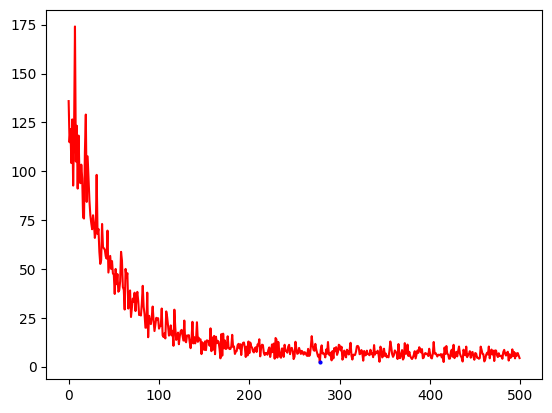

In [32]:
sgd_theta , losses = mini_batch_gradient_descent(X_3, y_3 , n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

####Batch_gradient_descent()

In [33]:
def batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate =0.01) :
  thetas = np. random . randn (4 , 1)
  thetas_path = [ thetas ]
  losses = []
  N = len(y)

  for i in range (n_epochs) :
    xi = X_b
    yi = y

    yi_hat = xi.dot(thetas)

    loss = (yi_hat - yi)**2

    d_loss = 2*(yi_hat - yi)

    gradients = xi.T.dot(d_loss)

    thetas = thetas - learning_rate * (gradients/N)

    thetas_path.append(thetas)
    mean_loss = np.sum(loss)/N
    losses.append (mean_loss)
  return thetas_path , losses

100
best loss is 11.376240701035421 with index is 99 and best theta is [[ 9.10483182]
 [ 3.06932308]
 [-1.06954193]
 [-0.93843013]]


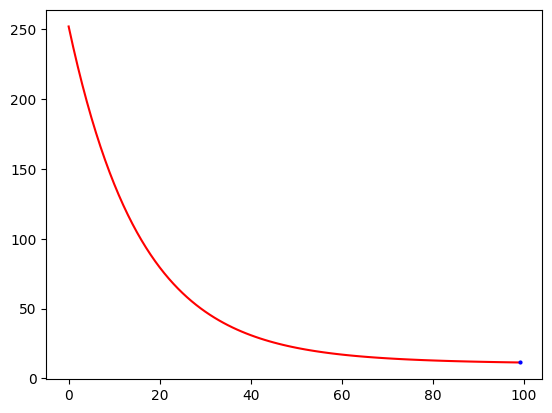

In [34]:
bgd_thetas, losses = batch_gradient_descent ( X_1 , y_1 , n_epochs =100 , learning_rate=0.01)
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

100
best loss is 13.587395942439896 with index is 99 and best theta is [[ 9.10483182]
 [ 3.06932308]
 [-1.06954193]
 [-0.93843013]]


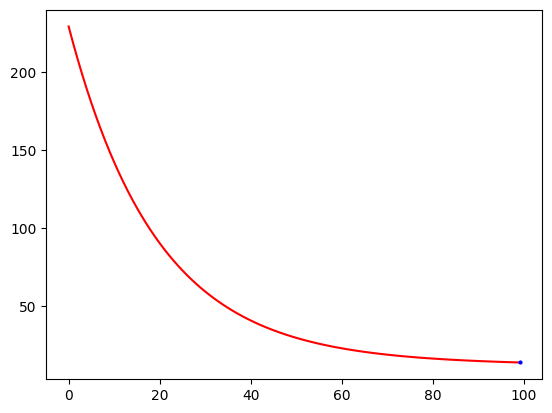

In [35]:
bgd_thetas, losses = batch_gradient_descent ( X_2 , y_2 , n_epochs =100 , learning_rate=0.01)
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

100
best loss is 20.57205216437379 with index is 99 and best theta is [[ 9.10483182]
 [ 3.06932308]
 [-1.06954193]
 [-0.93843013]]


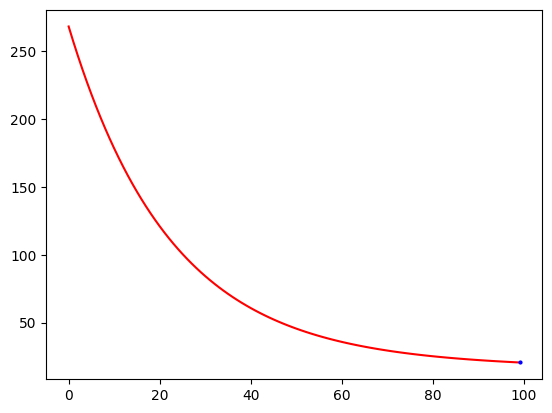

In [36]:
bgd_thetas, losses = batch_gradient_descent ( X_3 , y_3 , n_epochs =100 , learning_rate=0.01)
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

##Normal Equation